# Importing DataSet And Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rea-games-dataset/rea_games_dataset_updated.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/rea-games-dataset/rea_games_dataset_updated.csv")

# Initial Exploration

In [4]:
df.head()

,Game ID,Game Name,Platform,Genre,Release Date,Sales (Million $),Player Count (Million),Region,Age Group,Gender,Rating
0,GAME00001,Write always.,Xbox,RPG,2021-09-02,56.06,25.41,South America,46+,Male,1
1,GAME00002,Return.,Nintendo Switch,Adventure,2024-09-04,81.41,41.88,Asia,10-18,Female,8
2,GAME00003,Vote beautiful.,PC,Sports,2024-08-22,44.51,47.32,Asia,10-18,Male,8
3,GAME00004,Five operation be.,PC,Sports,2022-07-28,91.69,32.97,Australia,19-25,Male,8
4,GAME00005,Current above recent.,Xbox,Sports,2018-02-11,79.79,39.50,North America,46+,Female,8


In [5]:
df.shape

(50000, 11)

In [6]:
#Checking Duplicate
df.isnull().sum()

Game ID                   0
Game Name                 0
Platform                  0
Genre                     0
Release Date              0
Sales (Million $)         0
Player Count (Million)    0
Region                    0
Age Group                 0
Gender                    0
Rating                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game ID                 50000 non-null  object 
 1   Game Name               50000 non-null  object 
 2   Platform                50000 non-null  object 
 3   Genre                   50000 non-null  object 
 4   Release Date            50000 non-null  object 
 5   Sales (Million $)       50000 non-null  float64
 6   Player Count (Million)  50000 non-null  float64
 7   Region                  50000 non-null  object 
 8   Age Group               50000 non-null  object 
 9   Gender                  50000 non-null  object 
 10  Rating                  50000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [8]:
df["Release Date"]= pd.to_datetime(df["Release Date"],errors='coerce' )

In [9]:
df.describe()

,Release Date,Sales (Million $),Player Count (Million),Rating
count,50000,50000.000000,50000.000000,50000.000000
mean,2019-10-08 06:07:58.656000256,50.216254,24.974368,5.511440
min,2014-10-02 00:00:00,0.500000,0.100000,1.000000
25%,2017-04-13 00:00:00,25.517500,12.520000,3.000000
50%,2019-10-08 00:00:00,50.335000,24.950000,6.000000
75%,2022-04-07 00:00:00,75.040000,37.380000,8.000000
max,2024-10-01 00:00:00,100.000000,50.000000,10.000000
std,NaN,28.645562,14.357901,2.880957


# Exploratory Data Analysis (EDA)

In [10]:
# Total sales by genre
total_sales_by_genre = df.groupby("Genre")["Sales (Million $)"].sum().sort_values(ascending = False)

# Total sales by platform
total_sales_by_platform = df.groupby("Platform")["Sales (Million $)"].sum().sort_values(ascending = False)

print("Total Sales by Genre:\n",total_sales_by_genre)
print("\nTotal Sales by Platform:\n",total_sales_by_platform)

Total Sales by Genre:
 Genre
Adventure    430790.91
Shooter      426503.66
Sports       418723.04
Strategy     416704.01
RPG          414758.71
Action       403332.38
Name: Sales (Million $), dtype: float64

Total Sales by Platform:
 Platform
Xbox               506054.76
Nintendo Switch    504620.78
PS5                503418.09
Mobile             498627.49
PC                 498091.59
Name: Sales (Million $), dtype: float64


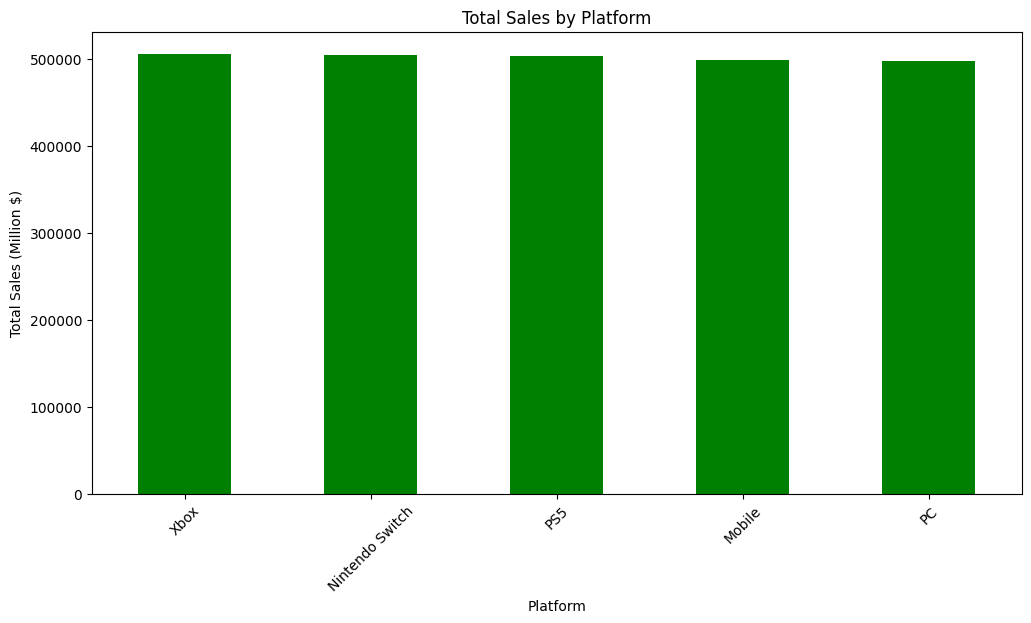

In [11]:
# Plot total sales by platform
plt.figure(figsize=(12, 6))
total_sales_by_platform.plot(kind='bar', color='green')
plt.title("Total Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

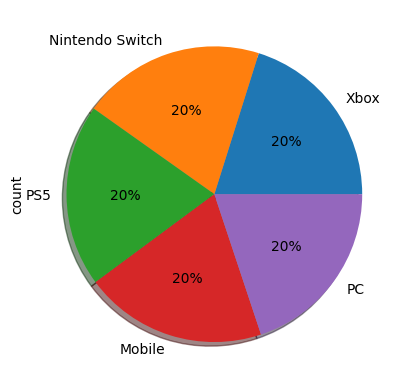

In [12]:
#Distribution Among Platform
df["Platform"].value_counts().plot(kind ="pie",autopct='%.0f%%',shadow = True)

<Axes: ylabel='count'>

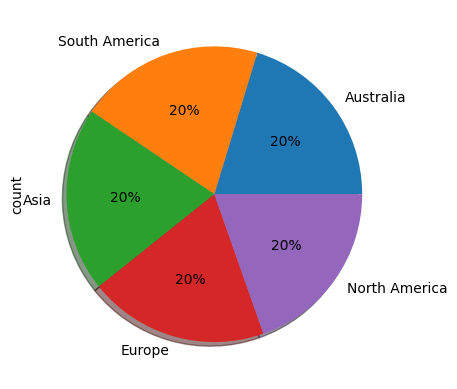

In [13]:
#Distribution Among Region
df["Region"].value_counts().plot(kind ="pie",autopct = '%.0f%%'
    , shadow = True)

In [14]:
# Games with highest sales
top_selling_games = df.sort_values(by = "Sales (Million $)",ascending = False).head(10)

# Games with lowest sales
lowest_selling_games = df.sort_values(by = "Sales (Million $)", ascending = True).head(10)

print("Top Selling Games:\n",top_selling_games[["Game Name","Sales (Million $)"]])
print("\nLowert Selling Games:\n",lowest_selling_games[["Game Name","Sales (Million $)"]])

Top Selling Games:
                           Game Name  Sales (Million $)
26641                 Find eat say.             100.00
49231                    Eat those.             100.00
1583          Value feel the light.              99.99
32170  Opportunity single material.              99.99
20006              Laugh know join.              99.99
24376               From trip best.              99.99
47566           Speak board myself.              99.99
10830            All whatever song.              99.99
8221                   Some school.              99.99
32773               Record country.              99.99

Lowert Selling Games:
                        Game Name  Sales (Million $)
18119             Forward teach.               0.50
7568     Smile between practice.               0.50
33477     Land participant name.               0.50
24363         Full also purpose.               0.50
29849  Nature building law only.               0.50
37689         Chair note moment.       

<Figure size 1200x600 with 0 Axes>

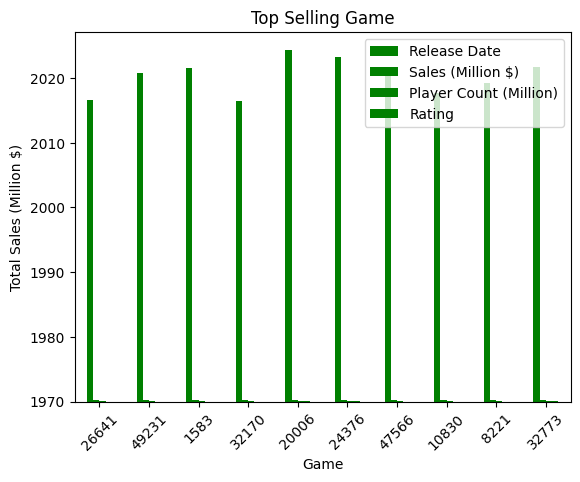

In [15]:
# Plot Top Selling Game
plt.figure(figsize=(12, 6))
top_selling_games.plot(kind='bar', color='green')
plt.title("Top Selling Game")
plt.xlabel("Game")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.show()

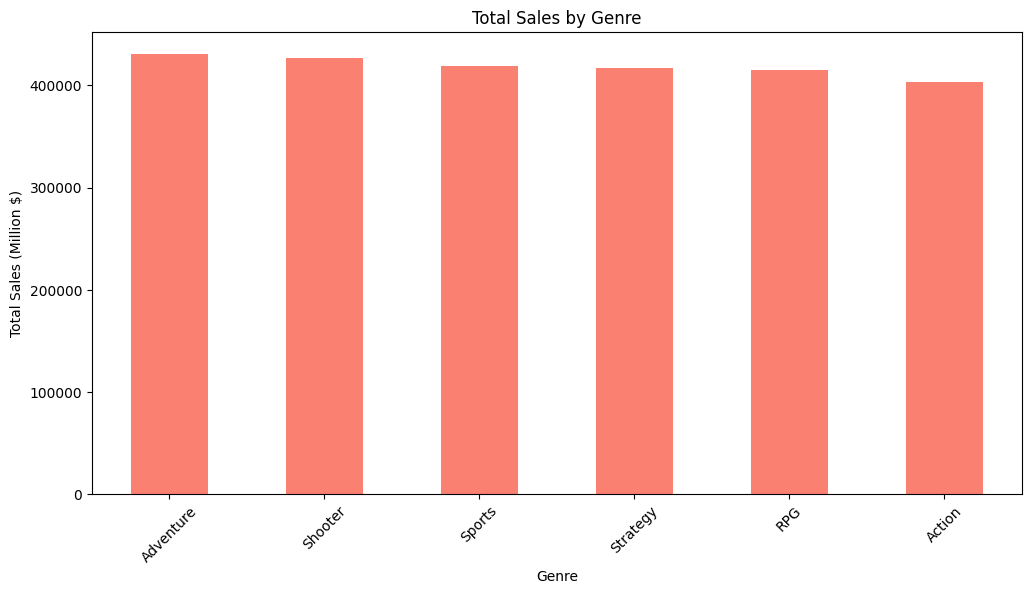

In [16]:
# Plot total sales by genre
plt.figure(figsize=(12, 6))
total_sales_by_genre.plot(kind='bar', color='salmon')
plt.title("Total Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.show()

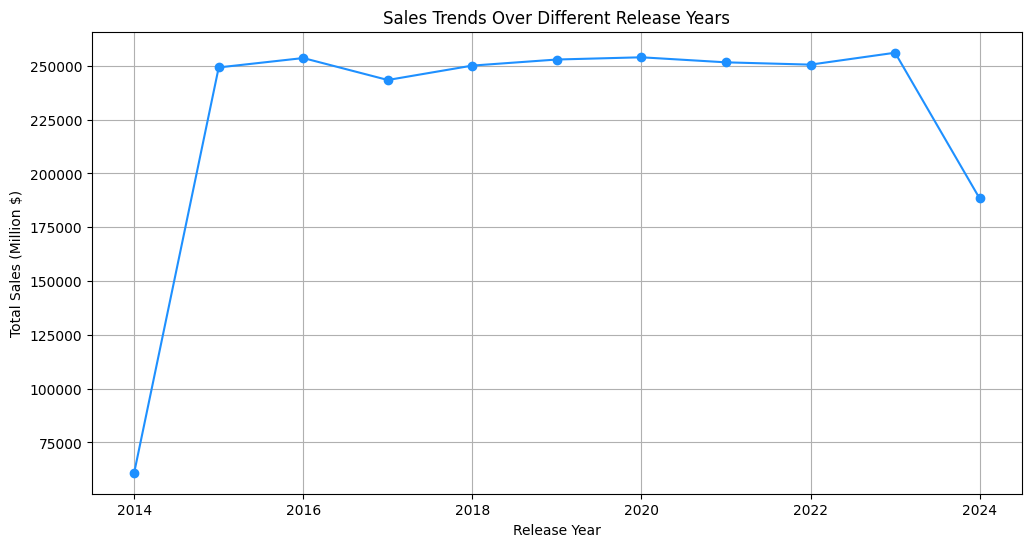

In [17]:
# Step 1: Ensure Release Date is in datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Step 2: Extract the year from the Release Date
df["Release Year"] = df["Release Date"].dt.year

# Step 3: Group by Release Year and calculate total sales
sales_by_year = df.groupby("Release Year")["Sales (Million $)"].sum().sort_index()

# Step 4: Plot the sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", color="dodgerblue")
plt.title("Sales Trends Over Different Release Years")
plt.xlabel("Release Year")
plt.ylabel("Total Sales (Million $)")
plt.grid(True)
plt.show()

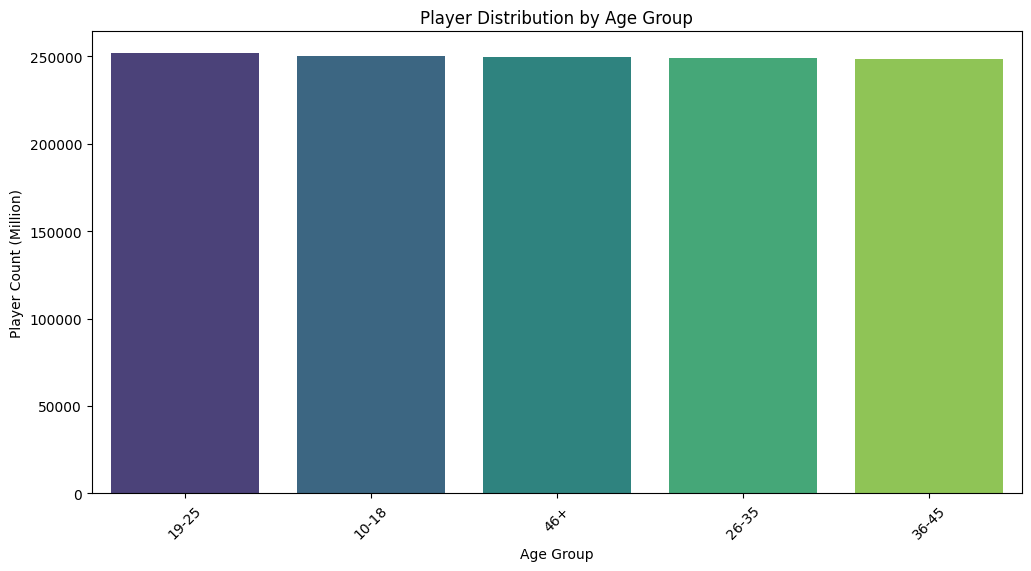

In [18]:
# Calculate distribution by Age Group
player_distribution_age = df.groupby("Age Group")["Player Count (Million)"].sum().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x = player_distribution_age.index, y = player_distribution_age.values,palette="viridis")
plt.title("Player Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.show()

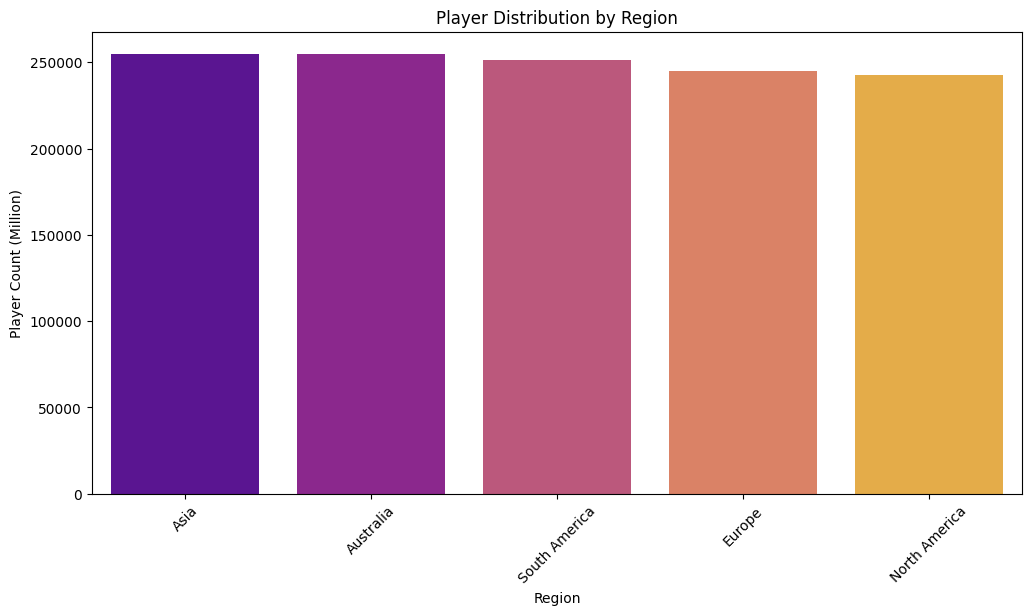

In [19]:
# Calculate distribution by Region
player_distribution_region = df.groupby("Region")["Player Count (Million)"].sum().sort_values(ascending = False)

#Player Distribution By Region
plt.figure(figsize=(12, 6))
sns.barplot(x = player_distribution_region.index, y = player_distribution_region.values,palette="plasma")
plt.title("Player Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.show()